In [52]:
import glob
%load_ext autoreload
%autoreload 2
import _pathmagic
from pathlib import Path
import os
import sys
import numpy as np
# signalfuncなどのある親ディレクトリのパスを取得
current_dir = os.path.join(Path().resolve())
# モジュールのあるパスを追加
sys.path.append(str(current_dir) + '/../')
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
# import scikitplot as skplt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
mid_dir="../output/experiments/discriminator_verification/mid_feature/5032AB/"
mid_files = os.listdir(mid_dir)
# search()

In [54]:
mid_features=np.array([np.load(f"{mid_dir}{file}") for file in mid_files])


In [55]:
#各データの15~30列(6~12時)のみ取得．フィルタもflatten
part_mid_features=np.array([mid_feature[:,15:30].flatten() for mid_feature in mid_features])

In [56]:
part_mid_features



array([[ 0.0098469 ,  0.0098469 ,  0.0098469 , ...,  0.01608644,
         0.02086766,  0.03296058],
       [ 0.0098469 , -0.01088265, -0.0181029 , ...,  0.01322147,
         0.04156996,  0.06376944],
       [ 0.0098469 , -0.00620767, -0.01169948, ...,  0.01795499,
         0.01949349,  0.01957083],
       ...,
       [ 0.0098469 ,  0.0098469 , -0.00523968, ...,  0.00912677,
         0.01875499,  0.02073403],
       [ 0.0098469 ,  0.0098469 ,  0.0098469 , ...,  0.01957083,
         0.01293906,  0.01540706],
       [-0.02456217,  0.00449471, -0.01905971, ..., -0.00173696,
        -0.00030564,  0.00485734]], dtype=float32)

In [57]:
index_20200507=mid_files.index("20.05.07.npy")


In [58]:
data_20200507=part_mid_features[index_20200507]


In [59]:
mid_distance={}
for i,part_mid_feature in enumerate(part_mid_features):
    mid_distance[mid_files[i]]=np.linalg.norm(part_mid_feature-data_20200507)


In [60]:
mid_distance_sorted = sorted(mid_distance.items(), key=lambda x:x[1])

In [61]:
mid_distance_sorted[:17]


[('20.05.07.npy', 0.0),
 ('19.09.20.npy', 0.34605482),
 ('20.04.11.npy', 0.4600784),
 ('20.02.25.npy', 0.4974337),
 ('20.07.10.npy', 0.50308585),
 ('20.06.01.npy', 0.614131),
 ('19.12.29.npy', 0.6555012),
 ('19.07.30.npy', 0.6629115),
 ('19.12.25.npy', 0.6633064),
 ('20.05.22.npy', 0.7010642),
 ('20.01.06.npy', 0.70286953),
 ('19.12.18.npy', 0.71070004),
 ('19.09.19.npy', 0.71080315),
 ('20.06.06.npy', 0.71283734),
 ('20.04.08.npy', 0.7279881),
 ('19.12.09.npy', 0.7312541),
 ('20.08.08.npy', 0.7333407)]

In [62]:
dates=[
'19.09.20',
'20.04.11',
'20.02.25',
'20.07.10',
'20.06.01',
'19.12.29',
'19.07.30',
'19.12.25',
'20.05.22',
'20.01.06',
'19.12.18',
'19.09.19',
'20.06.06',
'20.04.08',
'19.12.09',
'20.08.08']



In [63]:
dataset_5032AB=pd.read_csv("../data/elect_data/train/5032AB.csv",header=None,index_col=0)
dataset_5032AB


,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
0,,,,,,,,,,,,,,,,,,,,,
20.12.30,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.0,36.0,8.0,1.0,0.0,0.0,0.0,58.0,96.0,82
20.12.29,35,3.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
20.12.28,69,70.0,66,35,29.0,0.0,1.0,0.0,0.0,0.0,...,82.0,73.0,68.0,66.0,66.0,67.0,68.0,67.0,67.0,73
20.12.27,70,71.0,70,70,69.0,83.0,35.0,5.0,2.0,0.0,...,74.0,72.0,71.0,70.0,70.0,71.0,70.0,69.0,70.0,69
20.12.26,70,70.0,68,7,35.0,17.0,0.0,1.0,0.0,0.0,...,73.0,72.0,71.0,71.0,71.0,71.0,71.0,71.0,70.0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.02.10,0,2.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.0,72.0,73.0,72.0,72.0,72.0,49.0,35.0,25.0,25
19.02.09,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,70.0,69.0,69.0,118.0,35.0,13.0,0.0,1.0,0
19.02.08,0,0.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,73.0,72.0,72.0,71.0,71.0,112.0,34.0,11.0,1


In [64]:
like_20_05_07=dataset_5032AB.loc[dates]

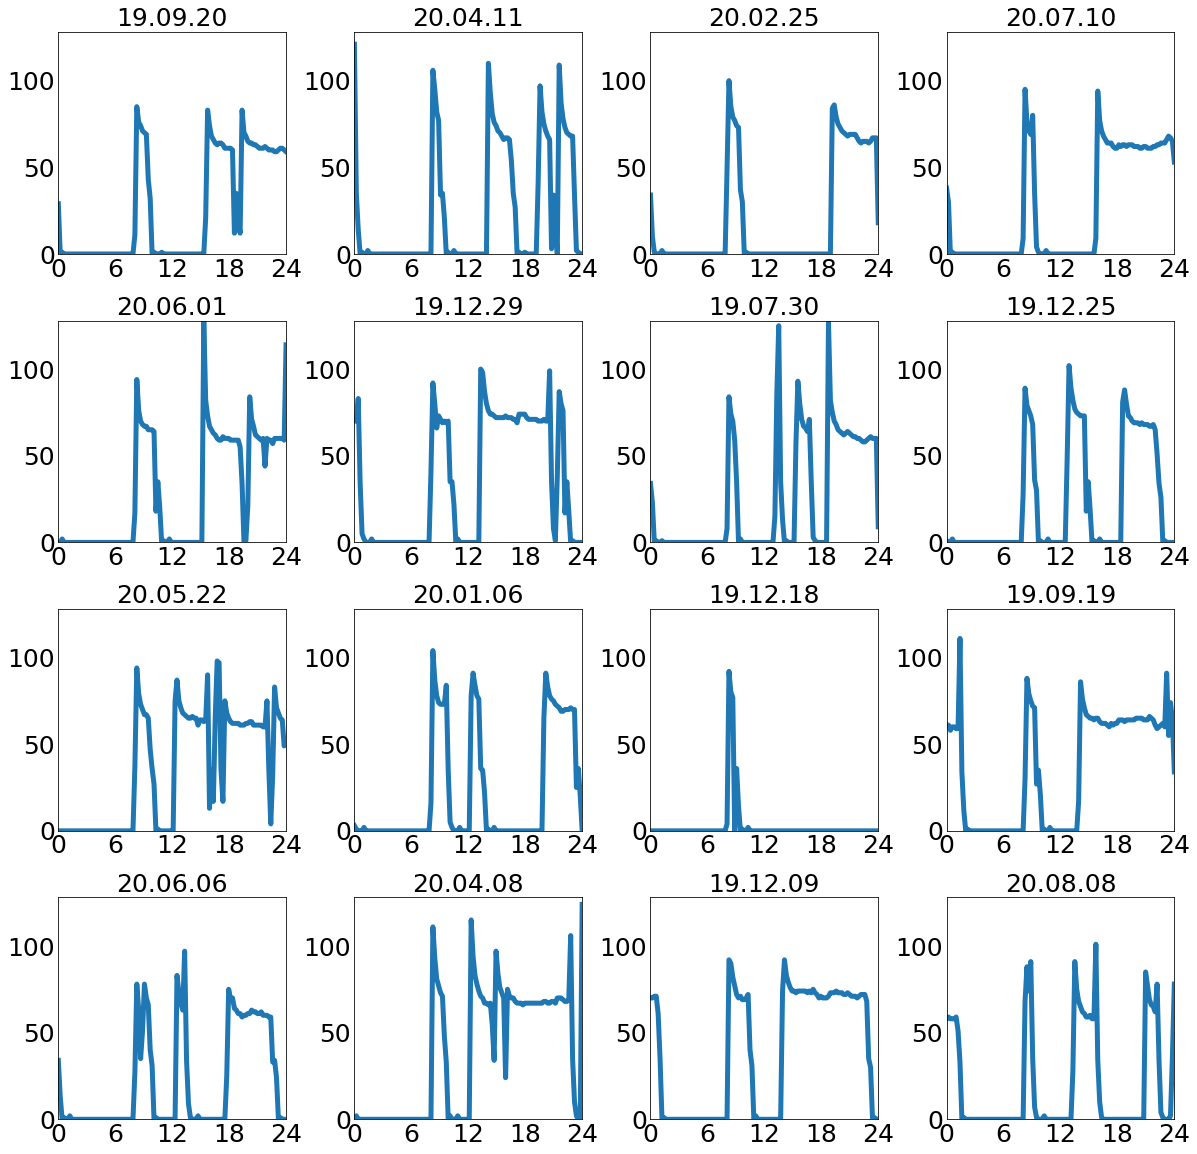

In [66]:
def save_sample_plot(gen_data):
    sample_num = 16
    # gen_sample = gen_data[np.random.choice(
    #     gen_data.shape[0], sample_num), :]
    gen_sample = gen_data.values
    # Write graph
    # b, w, c = gen_sample.shape
    # dir_path = "acgan/process_generated/" + self.data_id + "/"
    # os.makedirs(os.path.dirname(save_path), exist_ok=True)
    # save_path = os.path.join(dir_path, fname)
    # gen_sample = np.reshape(gen_sample, [b, w])
    
    x = np.linspace(0, 24, 120)
    plt.figure(figsize=(20, 20))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    dates=gen_data.index.to_list()
    for i, d in enumerate(gen_sample):
        plt.rcParams["font.size"] = 25
        plt.subplot(4, 4, i + 1)
        # plt.setp(axes.flat, aspect=1.0, adjustable='box-forced') 
        plt.xticks([0,6,12,18,24])
        plt.tick_params(length=0)
        plt.xlim([0, 24]) 
        y = max(128, d.max())
        plt.ylim([0, y])
        plt.gca().set_title(dates[i],size=25)
        plt.plot(x, d,lw=5)
    # plt.tight_layout()
    plt.show()
    # plt.savefig(save_path,bbox_inches='tight', pad_inches=0.01)
    plt.close()
save_sample_plot(like_20_05_07)